# Initializatoin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning\ Course/HW03

/content/drive/MyDrive/Colab Notebooks/Deep Learning Course/HW03


## Imports

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
from torch.nn import Parameter

from name_dataset import Dataset

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, you're encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

For the task at hand, you've been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. Your objective is to prognosticate the language of origin for a given name, relying solely on its orthography. Your task primarily involves implementing the section demarcated by `#your_code`.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Files already exist, skipping download and extraction.
category = Polish - random name = Niemec
category = English - random name = Lewin
category = Polish - random name = Kowalczyk
category = Vietnamese - random name = Doan
category = Dutch - random name = Meeuwe
category = Vietnamese - random name = Than
category = Polish - random name = Szewc
category = Irish - random name = Dubhshlaine
category = Russian - random name = Tzaregorodtsev
category = Japanese - random name = Hanabusa


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        #your_code
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):

        #your_code
        combined = torch.cat((input, hidden), 1)
        hidden = F.tanh(self.i2h(combined))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
n_letters = dataset.n_letters
n_categories = dataset.n_categories
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
#your_code
criterion = nn.NLLLoss()
learning_rate = 0.001

def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    #your_code
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

And here you can train your model and see it's performance after each 5000 iterations

5000 5% 2.8480 Hirose is predicted as a "Russian" name, status = ✗ (Japanese)
10000 10% 2.9388 Oirschot is predicted as a "English" name, status = ✗ (Dutch)
15000 15% 2.7963 Smeets is predicted as a "Greek" name, status = ✗ (Dutch)
20000 20% 2.8300 Bisset is predicted as a "English" name, status = ✗ (French)
25000 25% 2.5180 Ribeiro is predicted as a "Italian" name, status = ✗ (Portuguese)
30000 30% 1.7836 Sui is predicted as a "Korean" name, status = ✗ (Chinese)
35000 35% 2.3419 Hegney is predicted as a "Dutch" name, status = ✗ (English)
40000 40% 3.3550 Kool is predicted as a "Korean" name, status = ✗ (Dutch)
45000 45% 1.9918 Zogby is predicted as a "Arabic" name, status = ✓
50000 50% 1.3559 Chi is predicted as a "Vietnamese" name, status = ✗ (Korean)
55000 55% 2.1019 Sheridan is predicted as a "Irish" name, status = ✗ (English)
60000 60% 0.9110 She is predicted as a "Chinese" name, status = ✓
65000 65% 2.0067 Khouri is predicted as a "Japanese" name, status = ✗ (Arabic)
70000 70% 1.

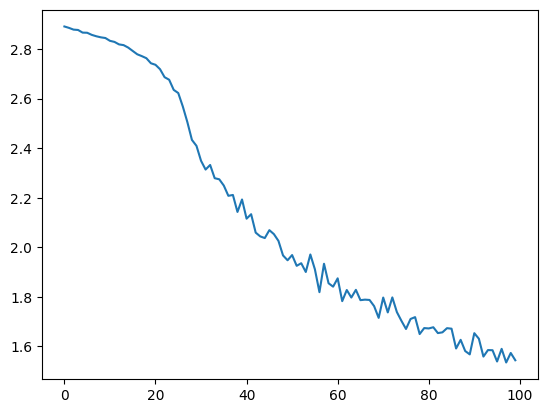

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

You are provided with a simple code that helps you to give the idea better. By modifying this code, you are able to demonstrate the mentioned disadvantages, but you are also free to change the code if needed or use any dataset you want.

**Question:** Do you think using GPU instead of CPU completely solves the first problem?

Note: The main goal of this part is to help you understand these problems better. Don't be too hard to implement and delivery.

Epoch [10/100], Loss: 1.4323
Epoch [20/100], Loss: 1.3219
Epoch [30/100], Loss: 1.2268
Epoch [40/100], Loss: 1.1424
Epoch [50/100], Loss: 1.0653
Epoch [60/100], Loss: 0.9920
Epoch [70/100], Loss: 0.9181
Epoch [80/100], Loss: 0.8372
Epoch [90/100], Loss: 0.7420
Epoch [100/100], Loss: 0.6270


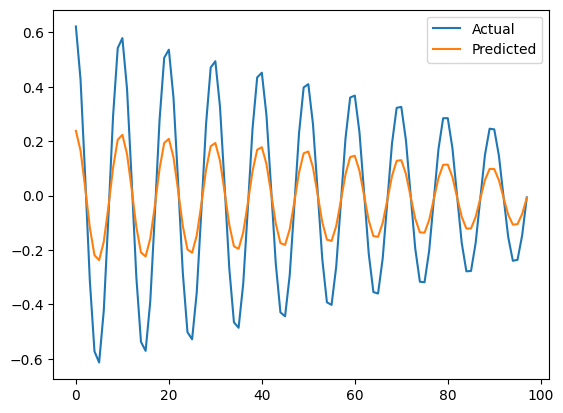

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

Now that you have experience with traditional RNNs, it's time to implement the LSTM model. Your goal is to implement the cell and model for LSTM architecture. The proposed dataset for this section is MNIST, allowing you to focus solely on model implementation.

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):

        # Inputs:
        #       input: (batch_size, input_size)
        #       hx: (batch_size, hidden_size)
        # Outputs:
        #       hy: (batch_size, hidden_size)
        #       cy: (batch_size, hidden_size)

        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size))
            hx = (hx, hx)

        hx, cx = hx

        # your code
        gates = (self.xh(input.reshape(-1, input.size(1))) + self.hh(hx)).squeeze()
        input_gate, forget_gate, cell_gate, output_gate = gates.chunk(4, 1)

        i_t = F.sigmoid(input_gate)
        f_t = F.sigmoid(forget_gate)
        g_t = F.tanh(cell_gate)
        o_t = F.sigmoid(output_gate)

        cy = torch.mul(cx, f_t) + torch.mul(i_t, g_t)
        hy = torch.mul(o_t, F.tanh(cy))

        return (hy, cy)

## LSTM Models

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        # c0 wasn't defined, had to add this
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        cn = c0[0,:,:]
        hn = h0[0,:,:]
        outs = []

        for seq in range(x.size(1)):
            # your code
            hn, cn = self.lstm(x[:, seq, :], (hn, cn))
            outs.append(hn)
        #your code
        out = self.fc(outs[-1].squeeze())
        return out

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  # ONLY 1 OR 2
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

# your code
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# your code
# Train model and print Loss and Accuracy on Test Dataset after each 500 iterations
counter = 1
for epoch in range(num_epochs):
    for data, labels in train_loader:
        data = Variable(data.reshape(-1, input_dim, input_dim))
        labels = Variable(labels)

        optimizer.zero_grad()
        outs = model(data)
        loss = criterion(outs, labels)
        loss.backward()
        optimizer.step()

        if counter % 500 == 0:
            correct_labels = 0
            all_labels = 0
            test_loss = 0
            with torch.no_grad():
                for testd, testl in test_loader:
                    testd = Variable(testd.reshape(-1, input_dim, input_dim))
                    testouts = model(testd)
                    ypred = torch.max(testouts.data, 1)[1]
                    correct_labels += (ypred == testl).sum().item()
                    all_labels += testl.shape[0]
                    test_loss += criterion(ypred.type(torch.FloatTensor) , testl.type(torch.FloatTensor)).item()
                print("Round", counter, ": Loss:", test_loss/all_labels,
                      ", Accuracy:", correct_labels/all_labels)
        counter += 1

Round 500 : Loss: 25.591887641906737 , Accuracy: 0.9387
Round 1000 : Loss: 25.472118403625487 , Accuracy: 0.9683
Round 1500 : Loss: 25.409429927062988 , Accuracy: 0.9716
Round 2000 : Loss: 25.37205639190674 , Accuracy: 0.9752
Round 2500 : Loss: 25.352175386047364 , Accuracy: 0.9793
Round 3000 : Loss: 25.356830195617675 , Accuracy: 0.9794
Round 3500 : Loss: 25.389239790344238 , Accuracy: 0.9778
Round 4000 : Loss: 25.335064057922363 , Accuracy: 0.982
Round 4500 : Loss: 25.36731549835205 , Accuracy: 0.9839
Round 5000 : Loss: 25.452724360656738 , Accuracy: 0.98
Round 5500 : Loss: 25.34756469268799 , Accuracy: 0.9828


# Sentiment Analysis

Now you are ready to face a real-world problem. In this task, we want you to do a sentiment analysis on the [IMDB dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The main goal is to reach more than an acceptable accuracy of **75%** on LSTM model. You are free to use torch.nn.LSTM to design your architecture, but you must prepare the IMDB dataset on your own.

In [5]:
# i downloaded the excel file and put it on /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning\ Course/HW03
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
from sklearn.model_selection import train_test_split

X, y = list(df['review']), list(df['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [7]:
import re
from collections import defaultdict, Counter
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


def preprocess(s):
    s1 = re.sub(r"[^\w\s]", '', s)
    s1 = re.sub(r"\s+", '', s1)
    s1 = re.sub(r"\d", '', s1)
    return s1


def pad(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features


def tokenize(x_train, y_train, x_test, y_test):
    corpus = defaultdict(int)
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess(word)
            if len(word) > 0 and not word in stopwords.words('english'):
                corpus[word] += 1
    corpus = sorted(corpus, key=corpus.get, reverse=True)[:1000]
    onehot_dict = {w: i + 1 for i, w in enumerate(corpus)}

    xtrain, xtest = [], []
    for sent in x_train:
            xtrain.append([onehot_dict.get(preprocess(word), 0) for word in sent.lower().split()])
    for sent in x_test:
            xtest.append([onehot_dict.get(preprocess(word), 0) for word in sent.lower().split()])

    maxlen = max(max([len(sent) for sent in xtrain]), max([len(sent) for sent in xtest]))
    maxlen = maxlen + 100 - (maxlen % 100)
    xtrain = pad(xtrain, maxlen)
    xtest = pad(xtest, maxlen)

    ytrain = np.array(list(map(lambda label: 0 if label != "positive" else 1, y_train)))
    ytest = np.array(list(map(lambda label: 0 if label != "positive" else 1, y_test)))
    return xtrain, ytrain, xtest, ytest, onehot_dict


x_train, y_train, x_test, y_test, vocab = tokenize(x_train, y_train, x_test, y_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(37500, 2500) (37500,) (12500, 2500) (12500,)


In [22]:
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

batch_size = 125
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [28]:
class MyLSTM(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, output_dim, embedding_dim):
        super(MyLSTM, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=no_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().reshape(-1, self.hidden_dim)
        out = self.fc(lstm_out)
        sig_out = self.sig(out)
        sig_out = sig_out.reshape(batch_size, -1)
        sig_out = sig_out[:, -1]
        return sig_out, hidden


    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        hidden = (h0, c0)
        return hidden

In [29]:
no_layers = 2
vocab_size = len(vocab) + 1
hidden_dim = 256
output_dim = 1
embedding_dim = 64
lr = 0.001

model = MyLSTM(no_layers, vocab_size, hidden_dim, output_dim, embedding_dim)

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
model.to(device)
print(model)

MyLSTM(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [25]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 5
for epoch in range(epochs):
    train_loss = 0
    train_acc = 0
    model.train()

    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        h = tuple(map(lambda hid: hid.data, h))
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        train_loss += loss.item()
        y_pred = torch.round(output.squeeze())
        accuracy = torch.sum(y_pred == labels.squeeze()).item()
        train_acc += accuracy
        optimizer.step()

    h = model.init_hidden(batch_size)
    test_loss = 0
    test_acc = 0
    model.eval()
    for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            h = tuple(map(lambda hid: hid.data, h))
            output, h = model(inputs, h)
            loss = criterion(output.squeeze(), labels.float())
            test_loss += loss.item()
            y_pred = torch.round(output.squeeze())
            accuracy = torch.sum(y_pred == labels.squeeze()).item()
            test_acc += accuracy

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc / len(train_loader.dataset))
    test_accuracies.append(test_acc / len(test_loader.dataset))

    print("Epoch", str(epoch + 1))
    print("Train Loss:", train_loss, end=" | ")
    print("Train Accuracy:", np.round(train_acc * 100 / len(train_loader.dataset), 2))
    print("Test Loss", test_loss, end=" | ")
    print("Test Accuracy:", np.round(test_acc * 100 / len(test_loader.dataset)))
    print("-" * 200)

Epoch 1
Train Loss: 207.38153010606766 | Train Accuracy: 54.33
Test Loss 69.3469762802124 | Test Accuracy: 50.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 2
Train Loss: 207.77559047937393 | Train Accuracy: 51.44
Test Loss 69.1319311261177 | Test Accuracy: 56.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 3
Train Loss: 154.94400599598885 | Train Accuracy: 73.07
Test Loss 38.60658937692642 | Test Accuracy: 83.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 4
Train Loss: 105.19472587108612 | Train Accuracy: 84.

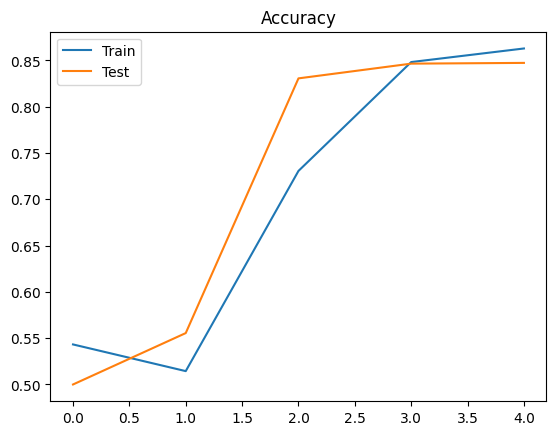

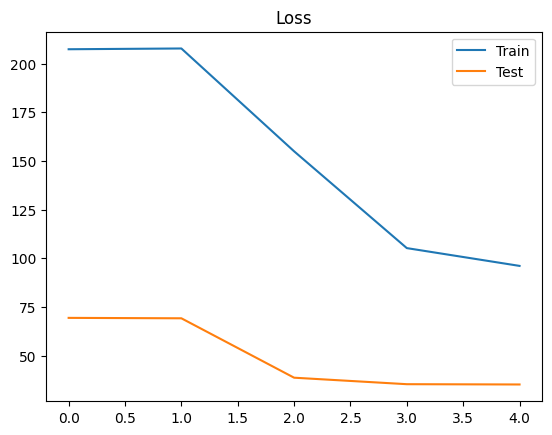

In [26]:
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.title("Loss")
plt.legend()
plt.show()